# Leader board

Check out the latest challenge results here!

:::{tip}

Be sure to refresh the page to get the latest results.
:::

## Top 10 teams

Check out the evolution of the leading teams's progress!

In [1]:
# Rules of the game
MAX_GATES = 150
MAX_PARAMS = 60

# Leaderboard config
NUM_LEADERS = 10

# Helper function to compute total submission score
def compute_score(entry):
    # Accuracy 
    score = entry.Accuracy

    # Gate penalty
    score += 5 * (MAX_GATES - entry.Gates) / MAX_GATES

    # Params penalty
    score += 5 * (MAX_PARAMS - entry.Parameters) / MAX_PARAMS
    return score

/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49296 (\N{HANGUL SYLLABLE BBI}) missing from font(s) DejaVu Sans.
  func(*

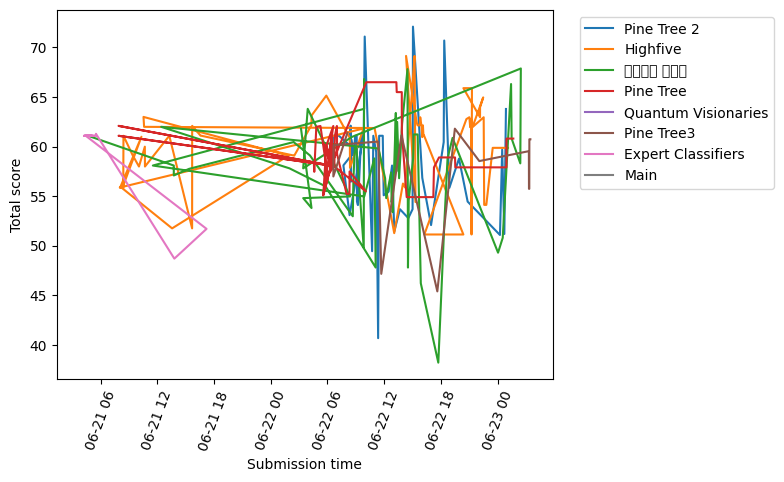

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve submissions and compute total score
results = pd.read_csv("results.csv", index_col=False)
results["Timestamp"] = pd.to_datetime(results.Timestamp, unit="s")
results.insert(1, "Score", results.apply(compute_score, axis=1))

# Get top teams, sorted by their highest scoring submission
gpby = results.groupby("Team")
top_teams = results.iloc[gpby.idxmax().Score].sort_values("Score", ascending=False)
leaders = top_teams[:NUM_LEADERS].reset_index(drop=True)

# Extract leading teams' data
agg = gpby.agg(list)
plt.xticks(rotation=70)
[plt.plot(agg.loc[team].Timestamp, agg.loc[team].Score) for team in leaders.Team]

# Make the plot pretty
plt.xlabel("Submission time")
plt.ylabel("Total score")
plt.legend(leaders.Team, bbox_to_anchor=(1.04, 1), loc="upper left");

In [3]:
leaders.rename(columns={"Score": "Top Score"})

,Team,Top Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Pine Tree 2,72.083333,f572d9,2024-06-22 15:02:42,64.0,10,19
1,Highfive,69.133333,18325c,2024-06-22 15:12:36,60.0,6,8
2,소나무가 삐지면,67.866667,5789e1,2024-06-23 02:27:15,60.0,14,20
3,Pine Tree,66.483333,b090f2,2024-06-22 10:06:39,58.0,8,15
4,Quantum Visionaries,62.083333,00ce1d,2024-06-21 03:45:55,54.0,10,19
5,Pine Tree3,61.800000,0e047a,2024-06-22 19:28:33,57.0,36,48
6,Expert Classifiers,61.283333,9b7ce8,2024-06-21 05:30:36,53.0,14,15
7,Main,61.083333,6e8482,2024-06-21 12:34:36,53.0,10,19


## Submission history

Please find all the challenge submissions below. Most recent submissions are at the top!

In [4]:
from IPython.display import display

history = results.sort_values("Timestamp", ascending=False).reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(history)

,Team,Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Pine Tree3,60.733333,d123b4,2024-06-23 03:27:43,52.0,8,12
1,Pine Tree3,60.733333,14a3f8,2024-06-23 03:21:27,52.0,8,12
2,Pine Tree3,55.733333,c2101c,2024-06-23 03:20:50,47.0,8,12
3,Pine Tree3,55.733333,cbf112,2024-06-23 03:20:20,47.0,8,12
4,Pine Tree3,55.733333,992324,2024-06-23 03:18:59,47.0,8,12
5,Pine Tree3,59.533333,b46da7,2024-06-23 03:18:20,53.0,14,36
6,소나무가 삐지면,67.866667,5789e1,2024-06-23 02:27:15,60.0,14,20
7,소나무가 삐지면,58.300000,4422ee,2024-06-23 02:23:54,49.0,6,6
8,Pine Tree,60.800000,759d55,2024-06-23 01:39:33,53.0,11,22
9,소나무가 삐지면,60.800000,d4a27e,2024-06-23 01:28:54,53.0,11,22
